In [11]:
# Let's import the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
from varname import nameof

import requests
from bs4 import BeautifulSoup
import html
import lxml

import sys, os

dir = os.path.dirname
sys.path.append(dir(os.getcwd()))

import src.utils.mining_data_tb as md
import src.utils.visualization_tb as vis
import src.utils.folder_tb as fo

import warnings
warnings.filterwarnings('ignore')

The purpose of my EDA is to find out whether a diet based on animal produts is efficient from a societal perspective.

This means, I'll do a cost-benefit analysis of the food animal sources and compare it to veggie alternatives.

For that purpose, I'll use the following data:
- Resources for food production (cost)
- Nutritional values of the food (benefit)

By measuring the relation between resources and nutritional values, we can determine which foods are more efficient.

# Resources

In [3]:
# First I'm gonna start analyzing the cost of the foods we eat

# Import the data
# Calculate paths to data
path1 = fo.path_to_folder(2, "data")
path2 = fo.path_to_folder(2, "data/Resources_use")

# Create the full resources dataframe
resources_df = md.get_resources_data(path1, path2)
resources_df.head()

,Total_emissions,Land use per 1000kcal,Land use per kg,Land use per 100g protein,Freswater withdrawls per 1000kcal,Freswater withdrawls per kg,Freswater withdrawls per 100g protein,Origin
Oatmeal,1.6,2.897446,7.60,5.846154,183.911552,482.4,371.076923,plant based
Rice,4.0,0.759631,2.80,3.943662,609.983722,2248.4,3166.760563,plant based
Potatoes,0.3,1.202186,0.88,5.176471,80.737705,59.1,347.647059,plant based
Cassava,0.9,1.858316,1.81,20.111111,NaN,0.0,NaN,plant based
Cane Sugar,2.6,0.581197,2.04,NaN,176.666667,620.1,NaN,plant based


Quick notes:
- All land use related data is measured in squared meters (m2)
- All water use related data is measured in liters (l)
- All emissions related data is measured in kg of CO2 per kg of food production

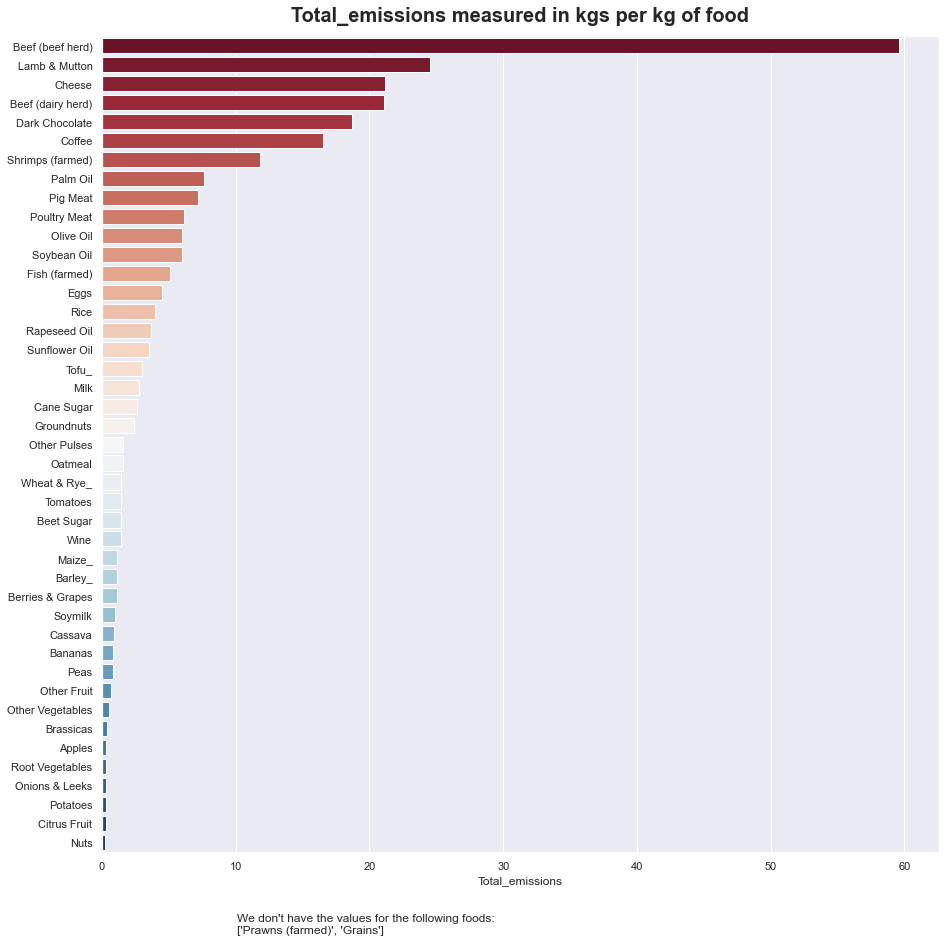

In [4]:
vis.resources_plot("Total_emissions", resources_df)
plt.show()

In [5]:
# Let's do the same for land and water use

# In those cases, we have more than one column (per kg, per 1000 kcal, per 100g of protein). I'll focus on the cost per kg as it is the best way to compare foods with such a different compositions. To produce 100g of protein based on apples, we would need quite a lot of resources, because that's not one of the key nutrients of that food. It'd be the same as measuring the amount of resources needed to get 100g of fiber from animal sources. Like way too much 

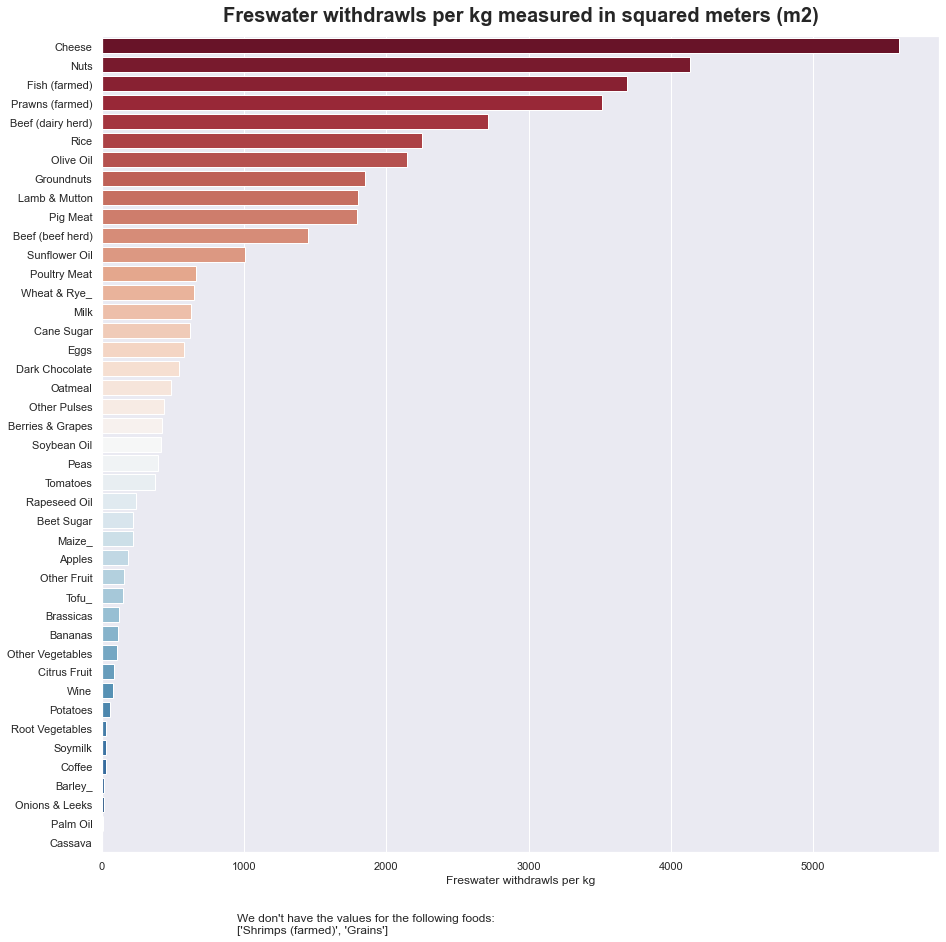

In [6]:
vis.resources_plot("Freswater withdrawls per kg", resources_df)
plt.show()

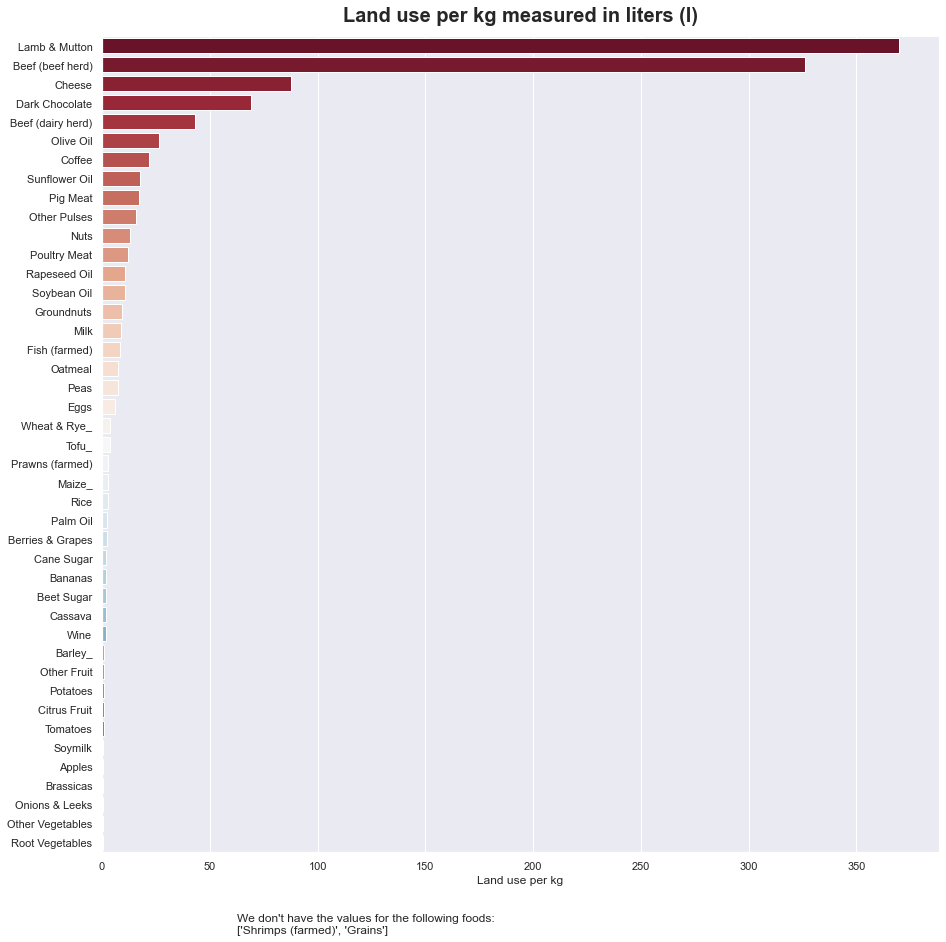

In [7]:
vis.resources_plot("Land use per kg", resources_df)
plt.show()

From this data we can already see how costly animal-based foods are from a resources standpoint compared to their plant-based counterparts.

However, to be as accurate as possible, let's see the center values comparing plant-based with animal-based

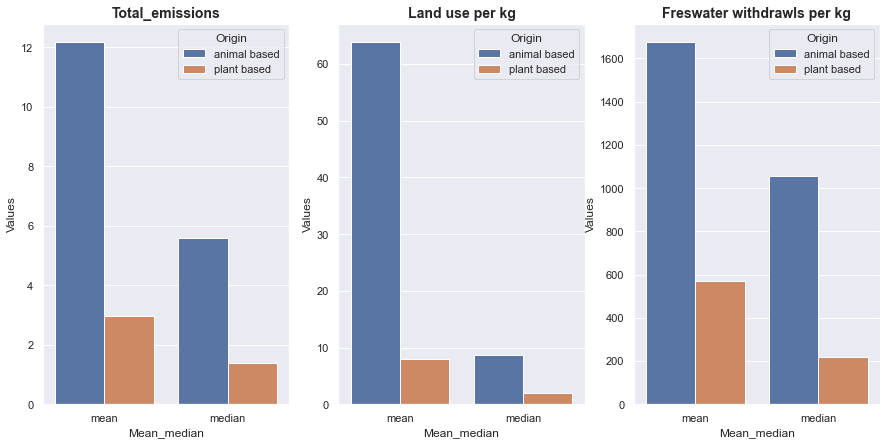

In [8]:
# Calculate stats according to origin : mean and median
stats = md.resources_stats(resources_df, ["Total_emissions", "Land use per kg", "Freswater withdrawls per kg"])
# some required transformation before plotting
to_plot = md.stats_to_plot(stats)
# plot
vis.plot_resources_stats(to_plot)
plt.show()

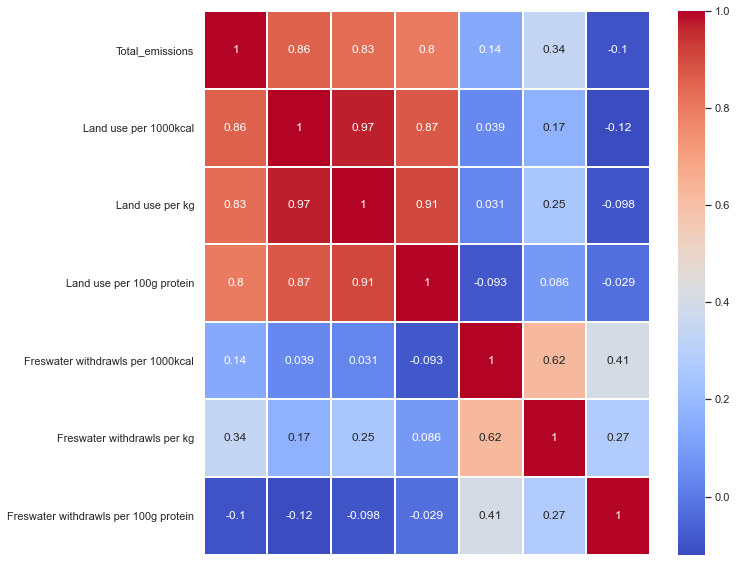

In [10]:
# The correlations here are not that interesting, but well, it doesn't hurt either
corr = resources_df.corr()
vis.correlation_plot(corr)
plt.show()

We can already conclude from this that animal-based products are much more expensive than the plant-based ones, for any category of the analysed ones.

Now, let's move on to the nutritional values analysis to see whether this "cost" difference is justified.

In [12]:
# Let's import the nutritional values data
path_nutrition = fo.path_to_folder(2, "data")
filename_nutrition = "2017-2018 FNDDS At A Glance - FNDDS Nutrient Values.xlsx"

nutrition_df = md.get_nutrition_data(path_nutrition, filename_nutrition)
nutrition_df.head()

,Category number,Category name,Protein (g),Water (g),"Fiber, total dietary (g)","Vitamin A, RAE (mcg_RAE)",Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),...,Zinc (mg),Energy (kcal),Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Vitamin D (D2 + D3) (mcg),Category 2,Category 3
Food name,,,,,,,,,,,,,,,,,,,,,
"Milk, human",9602,Human milk,1.03,87.50,0.0,61,0.014,0.036,0.177,0.011,...,0.17,70,4.38,2.009,1.658,0.497,14,0.1,milks,animal
"Milk, NFS",1004,"Milk, reduced fat",3.34,89.04,0.0,59,0.057,0.137,0.110,0.060,...,0.42,51,1.99,1.164,0.426,0.065,8,1.1,milks,animal
"Milk, whole",1002,"Milk, whole",3.28,88.10,0.0,32,0.056,0.138,0.105,0.061,...,0.41,60,3.20,1.860,0.688,0.108,12,1.1,milks,animal
"Milk, low sodium, whole",1002,"Milk, whole",3.10,88.20,0.0,29,0.020,0.105,0.043,0.034,...,0.38,61,3.46,2.154,0.999,0.128,14,1.3,milks,animal
"Milk, calcium fortified, whole",1002,"Milk, whole",3.28,88.10,0.0,32,0.056,0.138,0.105,0.061,...,0.41,60,3.20,1.860,0.688,0.108,12,1.1,milks,animal


In [35]:
stats = md.nutrients_stats(nutrition_df)
filter_ = md.nutrients_filter_2(1)
food_group = stats[filter_]
food_group

,Protein (g),Water (g),"Fiber, total dietary (g)","Vitamin A, RAE (mcg_RAE)",Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),Vitamin B-12 (mcg),"Folate, total (mcg)",Vitamin C (mg),Calcium (mg),Iron (mg),Magnesium (mg),Potassium (mg),Sodium (mg),Zinc (mg)
Category 2,,,,,,,,,,,,,,,,,
beans,8.882973,60.673784,7.198649,2.459459,0.147946,0.072365,0.620784,0.158378,0.019730,98.540541,1.077027,47.351351,2.337973,52.851351,399.216216,291.729730,1.134595
cheese,20.260959,51.280959,0.100000,167.876712,0.038397,0.326178,0.257000,0.091808,1.082877,15.246575,0.345205,593.767123,0.453288,25.671233,148.698630,738.205479,2.523973
chicken,23.178750,60.545580,0.159375,15.071429,0.089013,0.203741,6.596643,0.402201,0.473080,10.468750,0.177679,17.941964,1.088304,22.825893,252.625000,453.133929,1.710804
fish,21.006613,63.887604,0.287558,49.997696,0.123889,0.150747,4.530237,0.286878,3.589263,18.352535,1.040783,54.036866,1.368088,36.082949,333.656682,478.700461,2.189171
meats,21.688153,55.355811,0.153153,135.364865,0.358748,0.323032,5.481968,0.351568,2.059640,17.369369,2.112162,24.554054,1.572658,22.202703,352.657658,830.518018,2.672252
milk_substitutes,1.506667,85.346296,0.429630,62.851852,0.022074,0.104370,0.346074,0.030222,0.408889,5.703704,0.470370,138.851852,0.423704,14.777778,117.148148,62.925926,0.290370
milks,13.657712,73.903644,0.096610,28.550847,0.083864,0.252644,2.443559,0.138373,1.552542,9.093220,0.703390,92.483051,1.346610,17.584746,238.067797,165.661017,2.057627
nuts,17.534103,4.731667,8.097436,16.320513,0.291718,0.296808,5.365897,0.375179,0.001667,81.217949,1.050000,102.128205,3.613846,197.384615,606.205128,194.884615,3.663590
other_animal_products,10.936909,67.593091,0.117576,174.266667,0.047521,0.358691,0.367958,0.156812,0.633273,28.903030,0.928485,77.151515,1.327879,12.660606,150.278788,356.400000,1.065515


In [88]:
stats = md.nutrients_stats(nutrition_df)
filter_di = md.nutrients_filter_2(1)
stats_di = stats[filter_di]

food_groups = []

for ind in range(len(stats_di.index)):
    food_groups.append(stats_di.iloc[ind])


path_di = fo.path_to_folder(2, "data")
filename_di = "daily_intakes.csv"

men_30 = md.get_daily_intake_data(path_di, filename_di, "male", 30)


comparison1 = md.foodquality(men_30, food_groups).iloc[list(range(2, len(food_groups) * 2 + 2, 2))]
comparison1 = comparison1.unstack().reset_index()
comparison1.columns = ["Nutrient", "%OfDI", "Values"]
comparison1

,Nutrient,%OfDI,Values
0,Protein (g),%OfDI_beans,13.879645
1,Protein (g),%OfDI_cheese,31.657748
2,Protein (g),%OfDI_chicken,36.216797
3,Protein (g),%OfDI_fish,32.822833
4,Protein (g),%OfDI_meats,33.887739
...,...,...,...
182,Zinc (mg),%OfDI_milks,14.697337
183,Zinc (mg),%OfDI_nuts,26.168498
184,Zinc (mg),%OfDI_other_animal_products,7.610823
185,Zinc (mg),%OfDI_other_veggie_products,6.174603


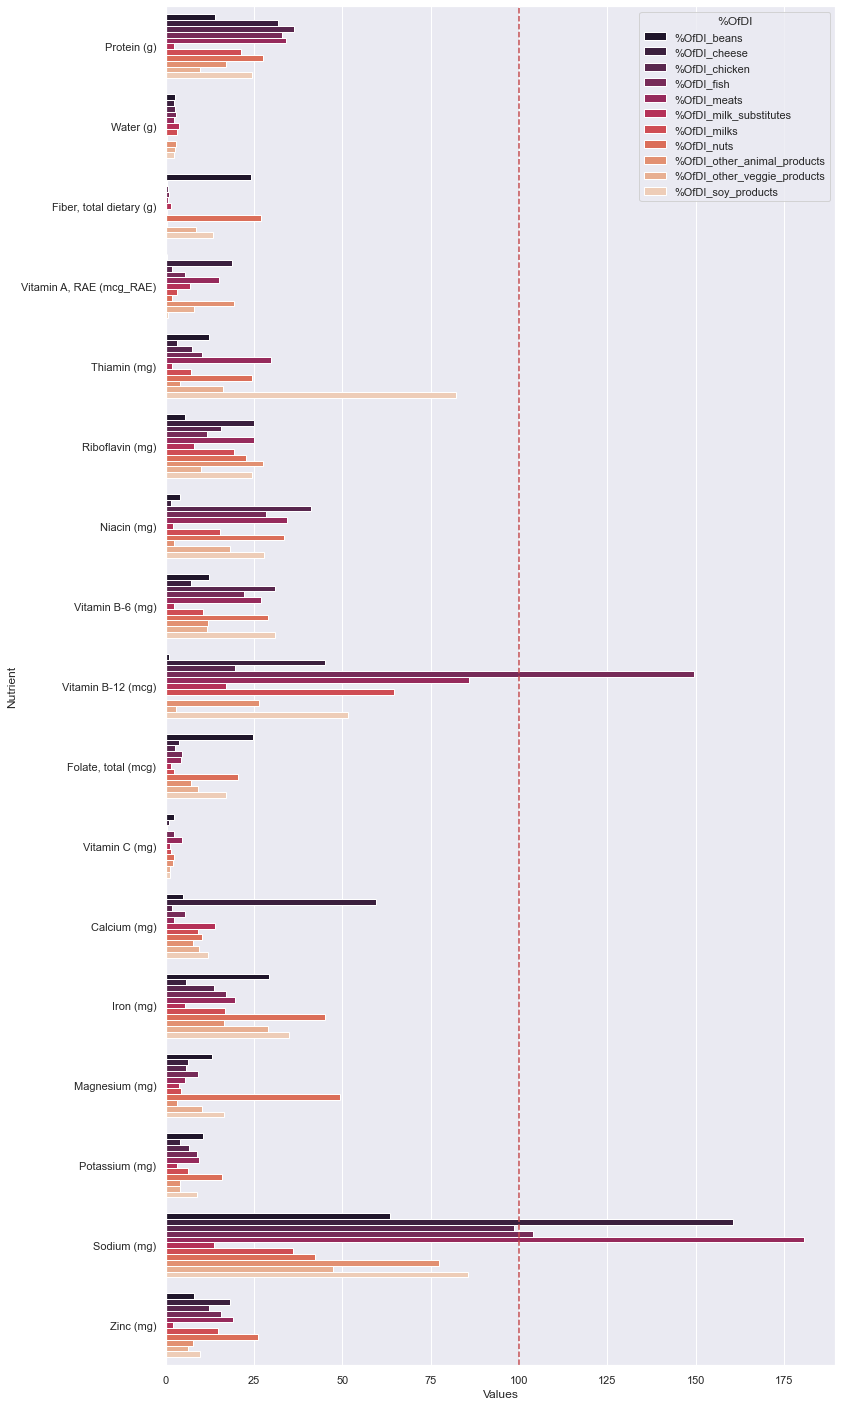

In [101]:
plt.figure(figsize = (12, 25))

palette = sns.color_palette("rocket", n_colors = len(food_groups))

sns.barplot(x = "Values", y = "Nutrient", hue = "%OfDI", data = comparison1, palette = palette)

plt.axvline(x=100, color='r', linestyle='dashed')

plt.show()

In [103]:
fats_and_calories = stats[md.nutrients_filter_2(2)[1:5]]
fats_and_calories = fats_and_calories.unstack()
fats_and_calories = fats_and_calories.reset_index()
fats_and_calories.columns = ["Nutrient", "Food group", "Values"]
fats_and_calories["Food group"].unique()

array(['beans', 'cheese', 'chicken', 'fish', 'meats', 'milk_substitutes',
       'milks', 'nuts', 'other_animal_products', 'other_veggie_products',
       'soy_products'], dtype=object)

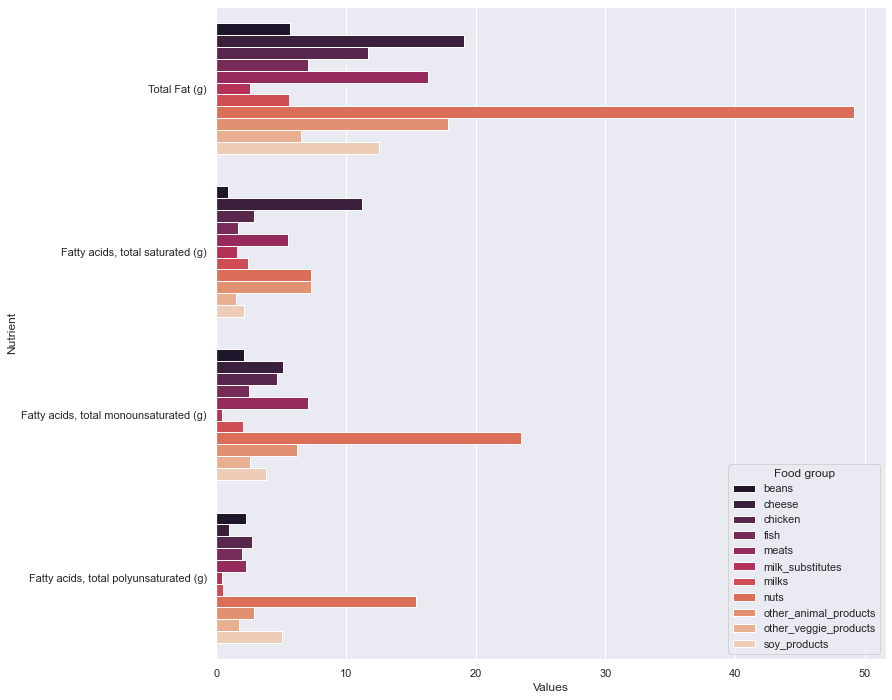

In [105]:
plt.figure(figsize = (12, 12))

last_color = len(fats_and_calories["Food group"].unique())

palette = sns.color_palette("rocket", n_colors = last_color)

sns.barplot(x = "Values", y = "Nutrient", hue = "Food group", data = fats_and_calories, palette = palette)

plt.show()

In [148]:
# Calculate means
stats = md.nutrients_stats(nutrition_df)

# Pull filters
filter_di = md.nutrients_filter_2(1)

filter_fats_calories = md.nutrients_filter_2(2)[:6]
filter_energy = filter_fats_calories[0]
filter_fats = filter_fats_calories[1:5]
filter_cholesterol = filter_fats_calories[-1]

# Filtered stats
choice1 = "beans"
choice2 = "fish"

# Daily intake comparison
stats_di = stats[filter_di]

path_di = fo.path_to_folder(2, "data")
filename_di = "daily_intakes.csv"

men_30 = md.get_daily_intake_data(path_di, filename_di, "male", 30)

food1 = stats_di.loc[choice1]
food2 = stats_di.loc[choice2]

food_groups = [food1, food2]

comparison_di = md.foodquality(men_30, food_groups)
comparison_di = comparison_di.iloc[list(range(2, len(food_groups) * 2 + 2, 2))]
comparison_di = comparison_di.unstack().reset_index()
comparison_di.columns = ["Nutrient", "%OfDI", "Values"]


# Fats comparison
stats_fats = stats[filter_fats]
comparison_fats = stats_fats.loc[[choice1, choice2]]
comparison_fats = comparison_fats.unstack()
comparison_fats = comparison_fats.reset_index()
comparison_fats.columns = ["Nutrient", "Food group", "Values"]
comparison_fats

# Cholesterol comparison
stats_cholesterol = stats[filter_cholesterol]
stats_cholesterol = stats_cholesterol.loc[[choice1, choice2]]
stats_cholesterol = stats_cholesterol.reset_index()
stats_cholesterol.columns = ["Food group", "Values"]
stats_cholesterol

# Kcal comparison


,Food group,Values
0,beans,1.432432
1,fish,85.361751


Text(0.5, 1.0, 'Cholesterol')

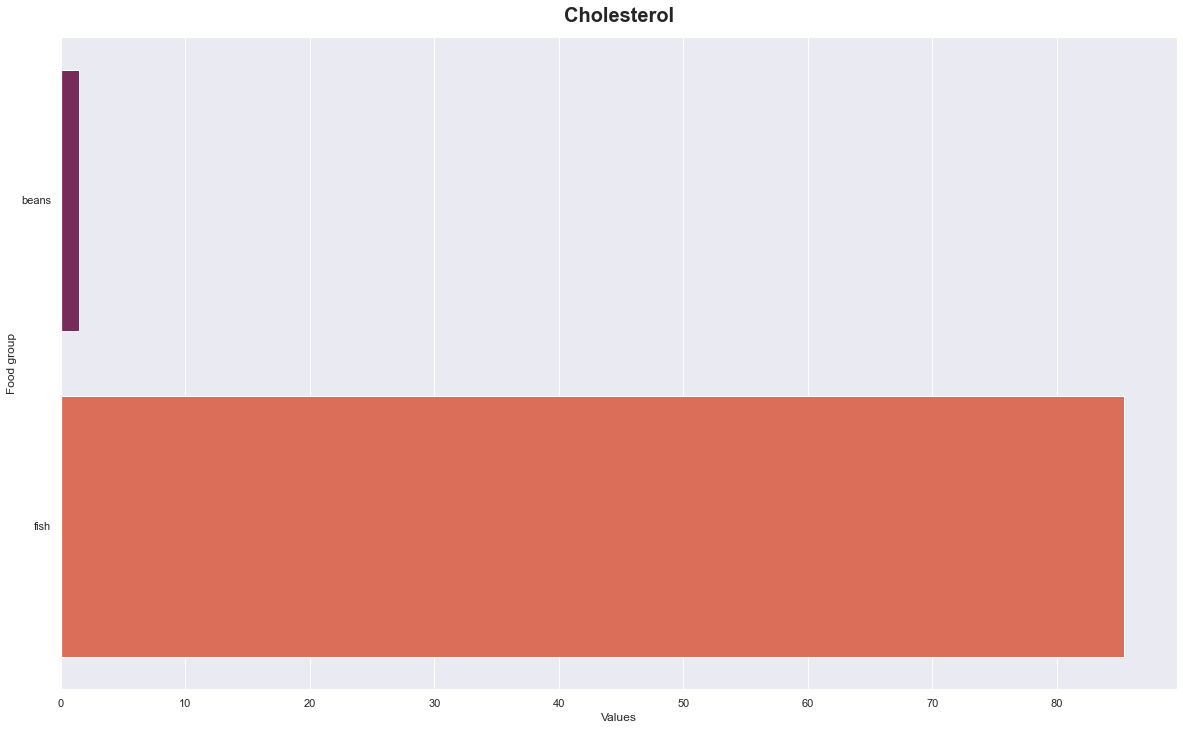

In [153]:
fig, ax3 = plt.subplots(1, 1, figsize = (20, 12))

palette_ax3 = sns.color_palette("rocket", n_colors = len(food_groups))

sns.barplot(x = "Values", y = "Food group", data = stats_cholesterol, palette = palette_ax3, ax = ax3)

ax3.set_title("Cholesterol", fontdict = {'fontsize': 20,
    'fontweight' : "bold"}, pad = 15)

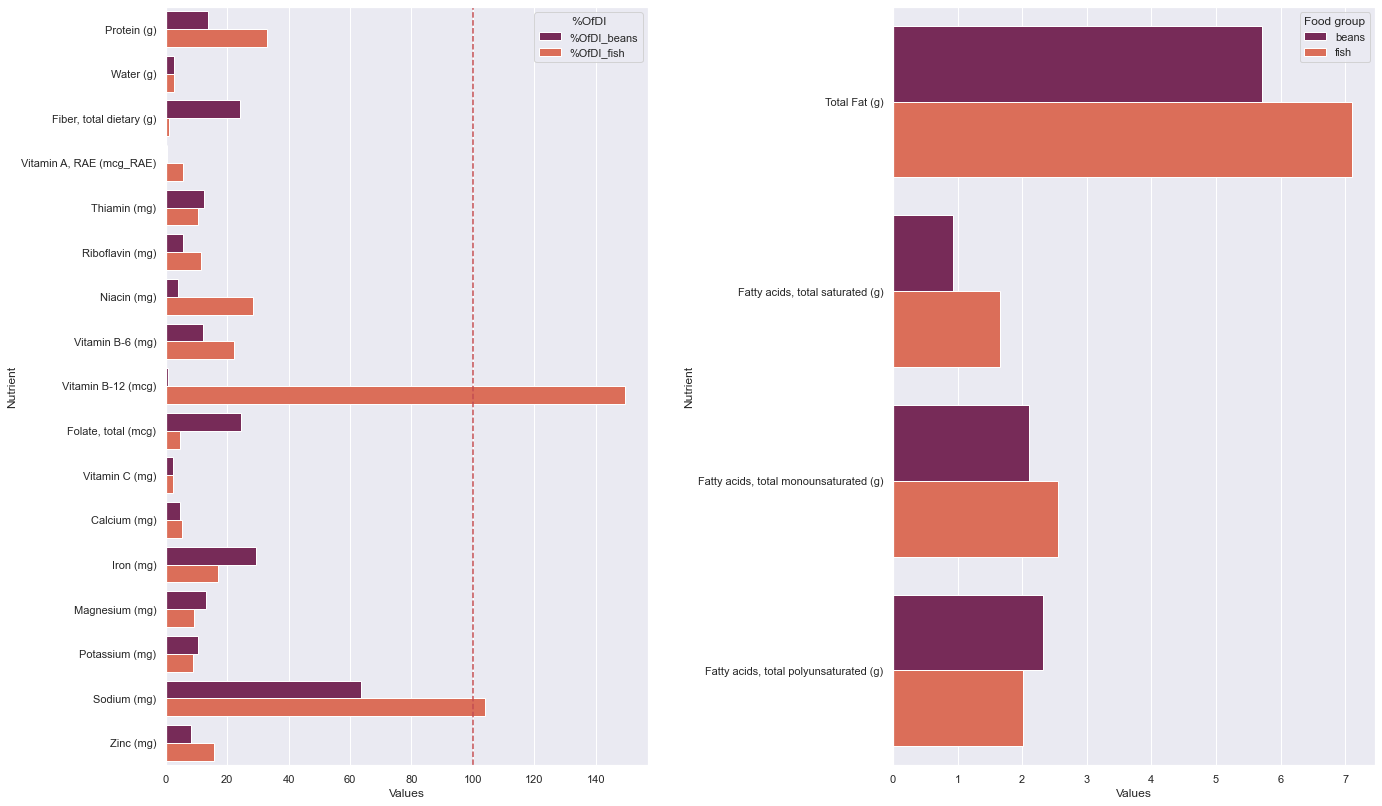

In [143]:
fig, (ax1, ax2, ax3) = plt.subplots(2, 2, figsize = (20, 20))

# ax1
palette_ax1 = sns.color_palette("rocket", n_colors = len(food_groups))

sns.barplot(x = "Values", y = "Nutrient", hue = "%OfDI", data = comparison_di, palette = palette_ax1, ax = ax1)

ax1.axvline(x=100, color='r', linestyle='dashed')


# ax2
last_color = len(food_groups)

palette_ax2 = sns.color_palette("rocket", n_colors = last_color)

sns.barplot(x = "Values", y = "Nutrient", hue = "Food group", data = comparison_fats, palette = palette_ax2, ax = ax2)


# ax3
palette_ax3 = sns.color_palette("rocket", n_colors = len(food_groups))

sns.barplot(x = "Values", y = "Food group", data = stats_cholesterol, palette = palette_ax3, ax = ax3)

ax3.set_title("Cholesterol", fontdict = {'fontsize': 20,
    'fontweight' : "bold"}, pad = 15)


fig.tight_layout(pad = 3)